In [1]:
print("all ok")

all ok


In [35]:
import random
import pandas as pd
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score

x,y=make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20,random_state=13)

In [36]:
import matplotlib.pyplot as plt


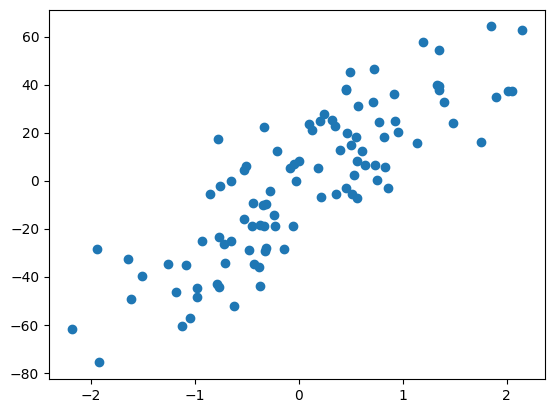

In [37]:
plt.scatter(x,y)

In [53]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12)

In [54]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()

lr.fit(x_train,y_train)



,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [55]:
print(lr.coef_)
print(lr.intercept_)

[28.07637482]
-3.5542386451751105


In [56]:
y_pred=lr.predict(x_test)

In [57]:
from sklearn.metrics import r2_score

print(r2_score(y_test,y_pred))

0.33021406456623015


In [40]:
print(np.mean(cross_val_score(lr,x,y,scoring='r2',cv=10)))

0.6375011587464419


In [41]:
# keeping m as contant
class GDRegressor:
    def __init__(self,learning_rate,epoch):
        self.m=27.82
        self.b=0
        self.learning_rate=learning_rate
        self.epoch=epoch

    def fit(self,x_train,y_train):
        # calculate b
        for i in range(self.epoch):
            loss_slope_b=-2 * np.sum(y_train - (self.m * x_train.ravel()) - self.b)
            self.b=self.b - (self.learning_rate * loss_slope_b)
            #print(loss_slope, self.b)
        print(self.b) 

In [42]:
gd=GDRegressor(0.001,100)

In [43]:
gd.fit(x,y)

-2.2942719821084423


In [61]:
# m,b both are not constant initialize with a random value
class GDRegressor:
    def __init__(self,learning_rate,epoch):
        self.m=1
        self.b=0
        self.learning_rate=learning_rate
        self.epoch=epoch

    def fit(self,x_train,y_train):
        # calculate b
        for i in range(self.epoch):
            loss_slope_b=-2 * np.sum(y_train - (self.m * x_train.ravel()) - self.b)
            loss_slope_m= -2 * np.sum((y_train - (self.m * x_train.ravel()) - self.b) * x_train.ravel() ) 
            self.m=self.m - (self.learning_rate * loss_slope_m)
            self.b=self.b - (self.learning_rate * loss_slope_b)
        print(f" m= {self.m} , b= {self.b}")
    def predict(self,x_test):
        return self.m * x_test + self.b


In [62]:
gd=GDRegressor(0.001,40)

In [64]:
gd.fit(x_train,y_train)

 m= 28.075765241293297 , b= -3.552928448797274


In [65]:
y_pred=gd.predict(x_test)

In [66]:
print("R2 score: ",r2_score(y_test,y_pred))

R2 score:  0.33025638353644204
